# Capstone 2 - Supervised Learning

For this capstone "Telecom Churn Dataset (IBM Watson Analytics)" dataset is used, which was downloaded from Kaggle website under the following address. [Link](https://www.kaggle.com/zagarsuren/telecom-churn-dataset-ibm-watson-analytics) <br>Customer churn refers to when a customer ends his relationship with a company. Reducing the customer churn is so important for businesses and it is a key goal as the cost of acquiring a new customer is higher than keeping an existing one. The aim of this Capstone is to develop and select the best model to predict the customer churn. 

In [0]:
# Set up environment by importing required libraries

import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import math
import graphviz

warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics, model_selection
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn import svm, datasets
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Loading Data

In [0]:
#reading the data

Telco = pd.read_excel("WA_Fn-UseC_-Telco-Customer-Churn.xlsx")

## Exploratory Data Analysis

In [0]:
# Get to know the data a bit and check the structure of dataset

Telco.info()


#Displaying the Top 5 rows in Data Set

Telco.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


With the first glance, we can see that "customer ID" is not useful for this analysis and we are going to remove it.

In [0]:
#dropping the 'customerID' as it is not useful for our analysis

Telco = Telco.drop(['customerID'], axis =1)

Also, as we can see from the data types that, the "TotalCharges" should be a float feature not object. 

In [0]:
#changing the data type of 'TotalCharges'

Telco['TotalCharges']=pd.to_numeric(Telco['TotalCharges'],errors="coerce")

Obviously, variables, <b>TotalCharges</b>, <b>MonthlyCharges</b> & <b>Tenure</b> are the variables that are directly correlated. As TotalCharges is the production of MonthlyCharges by Tenure, we can discard the TotalCharges feature in our analysis in order to avoid multicollinearity.

In [0]:
#dropping the 'TotalCharges' feature

Telco = Telco.drop(['TotalCharges'], axis =1)

In [0]:
#Let's see the shape of our dataset!

Telco.shape

(7043, 19)

In [0]:
#Before moving forward, let's check if there is any null or missing values

Telco.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64

In [0]:
#Let's see the distribution of customers' churn

Telco.Churn.value_counts(normalize = True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

As we can see from our data, only <b>26.6%</b> of the customers have churned out and <b>73.4%</b> of them have stayed with the company. Also, it is clear that we are dealing with an imbalanced dataset.

Text(0, 0.5, 'Count')

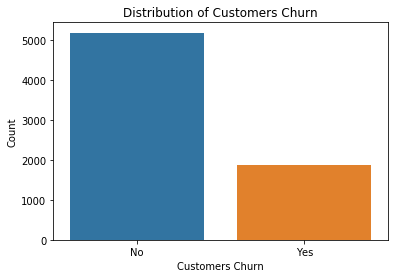

In [0]:
#And we can see the distribution of customers' churn visually

Churn = Telco.Churn.value_counts()
sb.barplot(x = Churn.index, y = Churn.values)
plt.title('Distribution of Customers Churn')
plt.xlabel('Customers Churn')
plt.ylabel('Count')

(array([0, 1]), <a list of 2 Text xticklabel objects>)

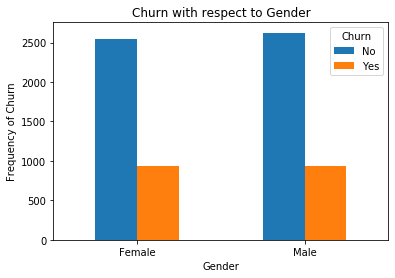

In [0]:
#we can see the distribution of customers' churn with respect to gender

pd.crosstab(Telco.gender, Telco.Churn).plot(kind = 'bar')
plt.title('Churn with respect to Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency of Churn')
plt.xticks(rotation = 0)

Above plot shows that our data is almost split down the middle, when comparing the gender split.

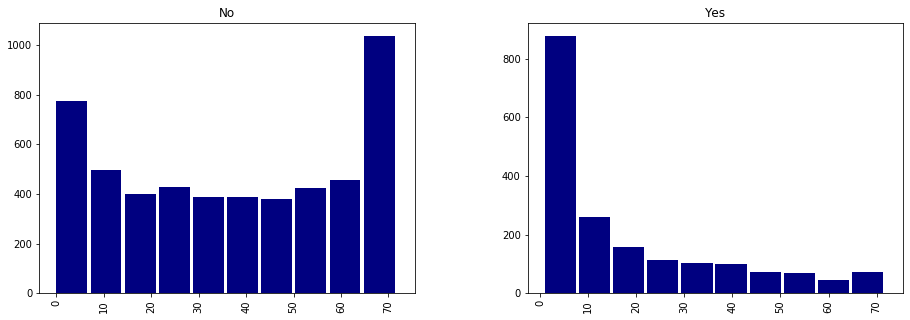

In [0]:
#in following plots we can compare the 'churn' and 'tenure' with each other

fig=Telco['tenure'].hist(by=Telco['Churn'],figsize=(15,5),width=6.5, color='navy' )
plt.show()

The left plot shows that most customers, who stay with the company are either new ones or ones that have been with the company for around 6 years. On the other hand, the right plot shows the churn rate for new customer is at the highest level.

Our aim is to predict the customer churn and it is important to see which variables are contributing the most in churnning. But before that we need to know if the variables are correlated if they are, we might want to avoid those in model building process.

In [0]:
#We want to relocate the Churn column to the beginning of the table.

front=Telco['Churn']
Telco.drop(labels=['Churn'],axis=1,inplace=True)
Telco.insert(0,'Churn',front)
Telco.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,No,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,No,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95
2,Yes,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85
3,No,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30
4,Yes,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70


In [0]:
#creating a dict file
Churn={'Yes':1,'No':0}

#traversing through dataframe Churn column and writing values where key matches
Telco.Churn=[Churn[item] for item in Telco.Churn]

In [0]:
#creating a dict file
gender={'Male':1,'Female':0}

#traversing through dataframe gender column and writing values where key matches
Telco.gender=[gender[item] for item in Telco.gender]

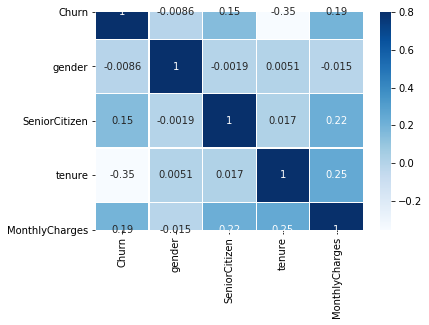

In [0]:
#Correlation Plot
corr=Telco.corr()

#Set uo the matplolib figure
f, ax = plt.subplots(figsize=(6, 4))

#Draw the heatmap using seaborn
colormap = plt.cm.Blues
sns.heatmap(corr, linewidths=0.1, cmap = colormap, linecolor = 'White', vmax=0.8, annot=True)

The majority of features consist categorical variables. In order to move forward in our analysis, we need to encode our categorical data and transform them to numerical data.

In [0]:
#transforming the data

Telco = pd.get_dummies(Telco)

## Data Preprocessing, Feature Selection & Feature Importance

As the first step in our data preprocessing, we split the data into <b>Features</b> and <b>Target</b>. After this we split our data into <b>Training</b> and <b>Testing</b>.

In [0]:
#Splitting the data into features & target

X = Telco.iloc[:,1:]     #independent columns
y = Telco[["Churn"]]      #target column

In [0]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=0,stratify=y)

In [0]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                                 Specs         Score
2                               tenure  16278.923685
3                       MonthlyCharges   3680.787699
34             Contract_Month-to-month    519.895311
36                   Contract_Two year    488.578090
41      PaymentMethod_Electronic check    426.422767
16                   OnlineSecurity_No    416.182917
25                      TechSupport_No    406.117093
14         InternetService_Fiber optic    374.476216
15                  InternetService_No    286.520193
17  OnlineSecurity_No internet service    286.520193


As we can see from the <b>SelectKBest</b> output, the top two features that contribute most to the customers' decision are <b>MonthlyCharges</b> and <b>tenure</b>. The features that are not important can be eliminated from the model development.

In [0]:
#Now, we are going to delete the unwanted feaures
Telco.drop(Telco.columns.difference(['tenure','MonthlyCharges','Contract_Month-to-month','Contract_Two year','PaymentMethod_Electronic check','OnlineSecurity_No','TechSupport_No','InternetService_Fiber optic','InternetService_No','OnlineSecurity_No internet service']),axis=1,inplace=True)

In [0]:
# DummyClassifier to predict only target 0
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
print('Test score: ', accuracy_score(y_test, dummy_pred))

NameError: ignored

We got an accuracy of 73% without training a model.

As we mentioined earlier, the <b>Churn</b> is imbalanced. By using the <b>resample</b> function we will make the ratio of data points equal for each class of Churn feature. 

In [0]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_churn = X[X.Churn==0]
churn = X[X.Churn==1]

# upsample minority
churn_upsampled = resample(churn,
                          replace=True, # sample with replacement
                          n_samples=len(not_churn), # match number in majority class
                          random_state=0) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_churn, churn_upsampled])

# check new class counts
upsampled.Churn.value_counts()

1    3622
0    3622
Name: Churn, dtype: int64

In [0]:
upsampled.Churn.value_counts(normalize = True)

1    0.5
0    0.5
Name: Churn, dtype: float64

After resampling we have an equal ratio of data points for each class. Let's define the independent and target columns again.

In [0]:
#Splitting the data into features & target based on the balanced data set

X_train = upsampled.drop('Churn', axis = 1)     #independent columns
y_train = upsampled.Churn                       #target column

## Developing the Models and Models Comparison 

Following models are selected to build and check which fits best on our data.<br> - kNN Classifier<br>- Logistic Regression<br> - Gaussian Naive-Bayes<br> - Random Forest Classifier<br> - Decision Tree Classifier<br> - Support Vector Machine (SVM)<br> - Gradient Boosting

### Model 1 - k Nearest Neighbors (kNN) Classifier

Using GridSearchCV for optimizing parameters

In [0]:
#GridSearchCV allows use to fine-tune hyper-parameters by searching over specified parameter values for an estimator.

k_range = list(range(1, 31)) 
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)

log_gs = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')

log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

best params: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
best params: {'n_neighbors': 1, 'weights': 'uniform'}
best score: 0.8797588112021337


In [0]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

knn.fit(X_train,y_train)

y_pred_knn = knn.predict(X_test)

train_acc_knn = round((knn.score(X_train, y_train))*100,1)
test_acc_knn = round((knn.score(X_test, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_knn)
print('Test accuracy: %s %%' % test_acc_knn)

Training accuracy: 99.5 %
Test accuracy: 72.7 %


In [0]:
cross_val_score(knn, X_train, y_train, cv=10)

array([0.88551724, 0.88275862, 0.88965517, 0.88827586, 0.85497238,
       0.86049724, 0.8839779 , 0.89226519, 0.87983425, 0.87983425])

In [0]:
print(classification_report(y_test, y_pred_knn))

##Confusion matrix

print('Test set of confusion matrix:', '\n', 
      confusion_matrix(y_test, y_pred_knn, labels=None, sample_weight=None))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1552
           1       0.49      0.48      0.48       561

    accuracy                           0.73      2113
   macro avg       0.65      0.65      0.65      2113
weighted avg       0.73      0.73      0.73      2113

Test set of confusion matrix: 
 [[1267  285]
 [ 291  270]]


### Model 2 - Logestic Regression

Using GridSearchCV for optimizing parameters

In [0]:
#GridSearchCV allows use to fine-tune hyper-parameters by searching over specified parameter values for an estimator.

param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression(solver='liblinear', # setting GridSearchCV
                                         class_weight="balanced", 
                                         random_state=7),
                      iid=True,
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

best params: LogisticRegression(C=0.06099999999999999, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
best params: {'C': 0.06099999999999999}
best score: 0.8511008220668527


In [1]:
lr = LogisticRegression(C=0.06099999999999999, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
lr.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test)

train_acc_log = round((lr.score(X_train, y_train))*100,1)
test_acc_log = round((lr.score(X_test, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_log)
print('Test accuracy: %s %%' % test_acc_log)

NameError: ignored

In [0]:
cross_val_score(lr, X_train, y_train, cv=10)

array([0.77241379, 0.79724138, 0.78482759, 0.74896552, 0.76519337,
       0.78453039, 0.75414365, 0.77348066, 0.75      , 0.76657459])

In [0]:
print(classification_report(y_test, y_pred_lr))

##Confusion matrix

print('Test set of confusion matrix:', '\n', 
      confusion_matrix(y_test, y_pred_lr, labels=None, sample_weight=None))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1552
           1       0.53      0.78      0.63       561

    accuracy                           0.76      2113
   macro avg       0.72      0.76      0.72      2113
weighted avg       0.80      0.76      0.77      2113

Test set of confusion matrix: 
 [[1161  391]
 [ 123  438]]


### Model 3 - Gaussian Naive-Bayes

Using GridSearchCV for optimizing parameters

In [0]:
#GridSearchCV allows use to fine-tune hyper-parameters by searching over specified parameter values for an estimator.

param_grid = {} # hyper-parameter list to fine-tune

#gridsearch searches for the best hyperparameters and keeps the classifier with the highest recall score
skf = StratifiedKFold(n_splits=10)

log_gs = GridSearchCV(GaussianNB(), cv=skf, param_grid=param_grid)

log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

best params: GaussianNB(priors=None, var_smoothing=1e-09)
best params: {}
best score: 0.7459887597637646


In [0]:
gaussian = GaussianNB(priors=None, var_smoothing=1e-09)

gaussian.fit(X_train, y_train)

y_pred_gauss = gaussian.predict(X_test)

train_acc_gauss = round((gaussian.score(X_train, y_train))*100,1)
test_acc_gauss = round((gaussian.score(X_test, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_gauss)
print('Test accuracy: %s %%' % test_acc_gauss)

Training accuracy: 74.7 %
Test accuracy: 70.2 %


In [0]:
cross_val_score(gaussian, X_train, y_train, cv=10)

array([0.77103448, 0.77241379, 0.76275862, 0.73517241, 0.73342541,
       0.76104972, 0.72099448, 0.73618785, 0.73066298, 0.73618785])

In [0]:
print(classification_report(y_test, y_pred_gauss))

##Confusion matrix

print('Test set of confusion matrix:', '\n', 
      confusion_matrix(y_test, y_pred_gauss, labels=None, sample_weight=None))

              precision    recall  f1-score   support

           0       0.92      0.65      0.76      1552
           1       0.47      0.85      0.60       561

    accuracy                           0.70      2113
   macro avg       0.69      0.75      0.68      2113
weighted avg       0.80      0.70      0.72      2113

Test set of confusion matrix: 
 [[1007  545]
 [  85  476]]


### Model 4 - Decision Tree Classifier

Using GridSearchCV for optimizing parameters

In [0]:
#GridSearchCV allows use to fine-tune hyper-parameters by searching over specified parameter values for an estimator.

param_grid = {'min_samples_split' : range(10,500,20),
              'max_depth': range(1,20,2)} # hyper-parameter list to fine-tune

log_gs = GridSearchCV(DecisionTreeClassifier(),
                      param_grid = param_grid, 
                      cv = 3, scoring='accuracy')

log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

best params: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=17, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
best params: {'max_depth': 17, 'min_samples_split': 10}
best score: 0.816536616687908


In [0]:
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=17, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
decision_tree.fit(X_train, y_train)

y_pred_dtc = decision_tree.predict(X_test)

train_acc_dtc = round((decision_tree.score(X_train, y_train))*100,1)
test_acc_dtc = round((decision_tree.score(X_test, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_dtc)
print('Test accuracy: %s %%' % test_acc_dtc)

Training accuracy: 93.5 %
Test accuracy: 72.8 %


In [0]:
cross_val_score(decision_tree, X_train, y_train, cv=10)

array([0.83172414, 0.8662069 , 0.82206897, 0.84      , 0.8301105 ,
       0.83149171, 0.84392265, 0.84116022, 0.8218232 , 0.8301105 ])

In [0]:
print(classification_report(y_test, y_pred_dtc))

##Confusion matrix

print('Test set of confusion matrix:', '\n', 
      confusion_matrix(y_test, y_pred_dtc, labels=None, sample_weight=None))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1552
           1       0.49      0.52      0.50       561

    accuracy                           0.73      2113
   macro avg       0.66      0.66      0.66      2113
weighted avg       0.73      0.73      0.73      2113

Test set of confusion matrix: 
 [[1248  304]
 [ 270  291]]


### Model 5 - Random Forest Classifier

Using GridSearchCV for optimizing parameters

In [0]:
#GridSearchCV allows use to fine-tune hyper-parameters by searching over specified parameter values for an estimator.

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
} # hyper-parameter list to fine-tune

log_gs = GridSearchCV(RandomForestClassifier(),
                      param_grid = param_grid, 
                      cv = 3, n_jobs = -1, verbose = 2)

log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  3.7min finished


best params: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=90, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
best params: {'bootstrap': True, 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}
best score: 0.8239918625135295


In [0]:
rfc = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

rfc.fit(X_train,y_train)

y_pred_rfc = rfc.predict(X_test)

train_acc_rfc = round((rfc.score(X_train, y_train))*100,1)
test_acc_rfc = round((rfc.score(X_test, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_rfc)
print('Test accuracy: %s %%' % test_acc_rfc)

Training accuracy: 89.8 %
Test accuracy: 76.2 %


In [0]:
cross_val_score(rfc, X_train, y_train, cv=10)

array([0.84      , 0.84827586, 0.84551724, 0.84689655, 0.82734807,
       0.8480663 , 0.82320442, 0.83977901, 0.8218232 , 0.84116022])

In [0]:
print(classification_report(y_test, y_pred_rfc))

##Confusion matrix

print('Test set of confusion matrix:', '\n', 
      confusion_matrix(y_test, y_pred_rfc, labels=None, sample_weight=None))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1552
           1       0.54      0.70      0.61       561

    accuracy                           0.76      2113
   macro avg       0.71      0.74      0.72      2113
weighted avg       0.79      0.76      0.77      2113

Test set of confusion matrix: 
 [[1220  332]
 [ 171  390]]


### Model 6 - Support Vector Machine (SVM)

Using GridSearchCV for optimizing parameters

In [0]:
#GridSearchCV allows use to fine-tune hyper-parameters by searching over specified parameter values for an estimator.

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']} # hyper-parameter list to fine-tune

log_gs = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.524, total=   3.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.520, total=   3.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.521, total=   3.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.518, total=   3.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.519, total=   3.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.752, total=   2.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.776, total=   2.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.773, total=   2.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.776, total=   2.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.809, total=   2.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.825, total=   2.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.821, total=   2.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.819, total=   2.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.802, total=   2.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.774, total=   1.9s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.777, total=   1.9s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.791, total=   7.7s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.792, total=   6.5s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.772, total=   3.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.772, total=   3.5s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.773, total=   3.3s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.765, total=   3.1s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.773, total=   3.2s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  6.4min finished


best params: SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
best params: {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
best score: 0.9353946711201095


In [0]:
svc = SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
svc.fit(X_train,y_train)

#predicting test data result
y_pred_svc = svc.predict(X_test)

train_acc_svc = round((svc.score(X_train, y_train))*100,1)
test_acc_svc = round((svc.score(X_test, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_svc)
print('Test accuracy: %s %%' % test_acc_svc)

Training accuracy: 99.6 %
Test accuracy: 74.9 %


In [0]:
cross_val_score(svc, X_train, y_train, cv=10)

array([0.95034483, 0.9462069 , 0.94206897, 0.94758621, 0.94751381,
       0.93370166, 0.94889503, 0.95718232, 0.94751381, 0.95165746])

In [0]:
print(classification_report(y_test, y_pred_svc))

##Confusion matrix

print('Test set of confusion matrix:', '\n', 
      confusion_matrix(y_test, y_pred_svc, labels=None, sample_weight=None))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85      1552
           1       0.65      0.12      0.20       561

    accuracy                           0.75      2113
   macro avg       0.70      0.55      0.53      2113
weighted avg       0.73      0.75      0.68      2113

Test set of confusion matrix: 
 [[1516   36]
 [ 494   67]]


### Model 7 - Gradient Boosting

Using GridSearchCV for optimizing parameters

In [0]:
#GridSearchCV allows use to fine-tune hyper-parameters by searching over specified parameter values for an estimator.

param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6, 8],
              'min_samples_leaf': [20, 50,100,150],
              } # hyper-parameter list to fine-tune

log_gs = GridSearchCV(GradientBoostingClassifier(), param_grid,
                               cv=2,
                               scoring='roc_auc',
                               verbose = 3, 
                               n_jobs=10);

log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

Fitting 2 folds for each of 48 candidates, totalling 96 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:    5.1s
[Parallel(n_jobs=10)]: Done  96 out of  96 | elapsed:   20.6s finished


best params: GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=20, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
best params: {'learning_rate': 0.1, 'max_depth': 8, 'min_samples_leaf': 20}
best score: 0.9055222990004334


In [0]:
gb = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=20, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
gb.fit(X_train, y_train)

#predicting test data result
y_pred_gb = gb.predict(X_test)

train_acc_svc = round((gb.score(X_train, y_train))*100,1)
test_acc_svc = round((gb.score(X_test, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_svc)
print('Test accuracy: %s %%' % test_acc_svc)

Training accuracy: 94.0 %
Test accuracy: 76.8 %


In [0]:
cross_val_score(gb, X_train, y_train, cv=10)

array([0.8537931 , 0.87034483, 0.86482759, 0.87310345, 0.84392265,
       0.85911602, 0.87569061, 0.87154696, 0.86187845, 0.85773481])

In [0]:
print(classification_report(y_test, y_pred_gb))

##Confusion matrix

print('Test set of confusion matrix:', '\n', 
      confusion_matrix(y_test, y_pred_gb, labels=None, sample_weight=None))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1552
           1       0.55      0.63      0.59       561

    accuracy                           0.77      2113
   macro avg       0.71      0.72      0.71      2113
weighted avg       0.78      0.77      0.77      2113

Test set of confusion matrix: 
 [[1267  285]
 [ 206  355]]


## Principal Component Analysis (PCA)

In [0]:
# Standardizing the features

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [0]:
#applying the PCA

pca = PCA(n_components = 23)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=23, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

X_train_pca = pca.transform(X_train)

X_test_pca = pca.transform(X_test)

### Model 1A - k Nearest Neighbors (kNN) Classifier

Using GridSearchCV for optimizing parameters

In [0]:
#GridSearchCV allows use to fine-tune hyper-parameters by searching over specified parameter values for an estimator.

k_range = list(range(1, 31)) 
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)

log_gs = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')

log_grid = log_gs.fit(X_train_pca, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

best params: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
best params: {'n_neighbors': 1, 'weights': 'uniform'}
best score: 0.8721640312440465


In [0]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

knn.fit(X_train_pca,y_train)

y_pred_knn = knn.predict(X_test_pca)

train_acc_knn = round((knn.score(X_train_pca, y_train))*100,1)
test_acc_knn = round((knn.score(X_test_pca, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_knn)
print('Test accuracy: %s %%' % test_acc_knn)

Training accuracy: 99.7 %
Test accuracy: 71.3 %


In [0]:
cross_val_score(knn, X_train_pca, y_train, cv=10)

array([0.88      , 0.88275862, 0.88965517, 0.88      , 0.86325967,
       0.84530387, 0.88674033, 0.85773481, 0.85773481, 0.87845304])

In [0]:
print(classification_report(y_test, y_pred_knn))

##Confusion matrix

print('Test set of confusion matrix:', '\n', 
      confusion_matrix(y_test, y_pred_knn, labels=None, sample_weight=None))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83      1552
           1       0.28      0.05      0.09       561

    accuracy                           0.71      2113
   macro avg       0.51      0.50      0.46      2113
weighted avg       0.61      0.71      0.63      2113

Test set of confusion matrix: 
 [[1477   75]
 [ 532   29]]


### Model 2A - Logestic Regression

Using GridSearchCV for optimizing parameters

In [0]:
#GridSearchCV allows use to fine-tune hyper-parameters by searching over specified parameter values for an estimator.

param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression(solver='liblinear', # setting GridSearchCV
                                         class_weight="balanced", 
                                         random_state=7),
                      iid=True,
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

log_grid = log_gs.fit(X_train_pca, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

best params: LogisticRegression(C=0.030999999999999996, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
best params: {'C': 0.030999999999999996}
best score: 0.8510319685619404


In [0]:
lr = LogisticRegression(C=0.030999999999999996, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
lr.fit(X_train_pca,y_train)

y_pred_lr = lr.predict(X_test_pca)

train_acc_log = round((lr.score(X_train_pca, y_train))*100,1)
test_acc_log = round((lr.score(X_test_pca, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_log)
print('Test accuracy: %s %%' % test_acc_log)

Training accuracy: 77.1 %
Test accuracy: 78.7 %


In [0]:
cross_val_score(lr, X_train_pca, y_train, cv=10)

array([0.77655172, 0.79586207, 0.78896552, 0.75034483, 0.76104972,
       0.79005525, 0.75414365, 0.7679558 , 0.75552486, 0.7679558 ])

In [0]:
print(classification_report(y_test, y_pred_lr))

##Confusion matrix

print('Test set of confusion matrix:', '\n', 
      confusion_matrix(y_test, y_pred_lr, labels=None, sample_weight=None))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.63      0.49      0.55       561

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.70      2113
weighted avg       0.77      0.79      0.78      2113

Test set of confusion matrix: 
 [[1389  163]
 [ 288  273]]


### Model 3A - Gaussian Naive-Bayes

Using GridSearchCV for optimizing parameters

In [0]:
#GridSearchCV allows use to fine-tune hyper-parameters by searching over specified parameter values for an estimator.

param_grid = {} # hyper-parameter list to fine-tune

#gridsearch searches for the best hyperparameters and keeps the classifier with the highest recall score
skf = StratifiedKFold(n_splits=10)

log_gs = GridSearchCV(GaussianNB(), cv=skf, param_grid=param_grid)

log_grid = log_gs.fit(X_train_pca, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

best params: GaussianNB(priors=None, var_smoothing=1e-09)
best params: {}
best score: 0.7632486187845304


In [0]:
gaussian = GaussianNB(priors=None, var_smoothing=1e-09)

gaussian.fit(X_train_pca, y_train)

y_pred_gauss = gaussian.predict(X_test_pca)

train_acc_gauss = round((gaussian.score(X_train_pca, y_train))*100,1)
test_acc_gauss = round((gaussian.score(X_test_pca, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_gauss)
print('Test accuracy: %s %%' % test_acc_gauss)

Training accuracy: 76.4 %
Test accuracy: 36.0 %


In [0]:
cross_val_score(gaussian, X_train_pca, y_train, cv=10)

array([0.7737931 , 0.7862069 , 0.7737931 , 0.7462069 , 0.74585635,
       0.77762431, 0.74723757, 0.75966851, 0.76243094, 0.75966851])

In [0]:
print(classification_report(y_test, y_pred_gauss))

##Confusion matrix

print('Test set of confusion matrix:', '\n', 
      confusion_matrix(y_test, y_pred_gauss, labels=None, sample_weight=None))

              precision    recall  f1-score   support

           0       0.99      0.13      0.23      1552
           1       0.29      0.99      0.45       561

    accuracy                           0.36      2113
   macro avg       0.64      0.56      0.34      2113
weighted avg       0.80      0.36      0.29      2113

Test set of confusion matrix: 
 [[ 203 1349]
 [   3  558]]


### Model 4A - Decision Tree Classifier

Using GridSearchCV for optimizing parameters

In [0]:
#GridSearchCV allows use to fine-tune hyper-parameters by searching over specified parameter values for an estimator.

param_grid = {'min_samples_split' : range(10,500,20),
              'max_depth': range(1,20,2)} # hyper-parameter list to fine-tune

log_gs = GridSearchCV(DecisionTreeClassifier(),
                      param_grid = param_grid, 
                      cv = 3, scoring='accuracy')

log_grid = log_gs.fit(X_train_pca, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

best params: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=19, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
best params: {'max_depth': 19, 'min_samples_split': 10}
best score: 0.8353133292508677


In [0]:
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=19, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
decision_tree.fit(X_train_pca, y_train)

y_pred_dtc = decision_tree.predict(X_test_pca)

train_acc_dtc = round((decision_tree.score(X_train_pca, y_train))*100,1)
test_acc_dtc = round((decision_tree.score(X_test_pca, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_dtc)
print('Test accuracy: %s %%' % test_acc_dtc)

Training accuracy: 96.4 %
Test accuracy: 58.0 %


In [0]:
cross_val_score(decision_tree, X_train_pca, y_train, cv=10)

array([0.87586207, 0.86482759, 0.87310345, 0.85793103, 0.86049724,
       0.85773481, 0.87016575, 0.85359116, 0.84254144, 0.87430939])

In [0]:
print(classification_report(y_test, y_pred_dtc))

##Confusion matrix

print('Test set of confusion matrix:', '\n', 
      confusion_matrix(y_test, y_pred_dtc, labels=None, sample_weight=None))

              precision    recall  f1-score   support

           0       0.88      0.49      0.63      1552
           1       0.37      0.82      0.51       561

    accuracy                           0.58      2113
   macro avg       0.63      0.66      0.57      2113
weighted avg       0.75      0.58      0.60      2113

Test set of confusion matrix: 
 [[767 785]
 [102 459]]


### Model 5A - Random Forest Classifier

Using GridSearchCV for optimizing parameters

In [0]:
#GridSearchCV allows use to fine-tune hyper-parameters by searching over specified parameter values for an estimator.

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
} # hyper-parameter list to fine-tune

log_gs = GridSearchCV(RandomForestClassifier(),
                      param_grid = param_grid, 
                      cv = 3, n_jobs = -1, verbose = 2)

log_grid = log_gs.fit(X_train_pca, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  9.2min finished


best params: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=90, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
best params: {'bootstrap': True, 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}
best score: 0.8728603505088502


In [0]:
rfc = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

rfc.fit(X_train_pca,y_train)

y_pred_rfc = rfc.predict(X_test_pca)

train_acc_rfc = round((rfc.score(X_train_pca, y_train))*100,1)
test_acc_rfc = round((rfc.score(X_test_pca, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_rfc)
print('Test accuracy: %s %%' % test_acc_rfc)

Training accuracy: 97.2 %
Test accuracy: 73.5 %


In [0]:
cross_val_score(rfc, X_train_pca, y_train, cv=10)

array([0.89517241, 0.89517241, 0.88689655, 0.90482759, 0.86878453,
       0.8839779 , 0.89640884, 0.89502762, 0.87430939, 0.88950276])

In [0]:
print(classification_report(y_test, y_pred_rfc))

##Confusion matrix

print('Test set of confusion matrix:', '\n', 
      confusion_matrix(y_test, y_pred_rfc, labels=None, sample_weight=None))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1552
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.54      0.73      0.62      2113

Test set of confusion matrix: 
 [[1552    0]
 [ 561    0]]


### Model 6A - Support Vector Machine (SVM)

Using GridSearchCV for optimizing parameters

In [0]:
#GridSearchCV allows use to fine-tune hyper-parameters by searching over specified parameter values for an estimator.

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']} # hyper-parameter list to fine-tune

log_gs = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

log_grid = log_gs.fit(X_train_pca, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.660, total=   2.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.718, total=   2.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.6s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.669, total=   2.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.676, total=   2.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.671, total=   2.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.789, total=   1.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.778, total=   1.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.783, total=   1.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.766, total=   1.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.807, total=   1.6s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.799, total=   1.6s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.792, total=   1.6s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.781, total=   1.6s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.800, total=   1.6s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.783, total=   1.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.762, total=   1.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.768, total=   4.2s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.784, total=   4.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.785, total=   1.7s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.761, total=   1.8s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.763, total=   1.8s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.750, total=   1.8s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.748, total=   1.8s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  4.9min finished


best params: SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
best params: {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
best score: 0.9104087787729392


In [0]:
svc = SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
svc.fit(X_train_pca,y_train)

#predicting test data result
y_pred_svc = svc.predict(X_test_pca)

train_acc_svc = round((svc.score(X_train_pca, y_train))*100,1)
test_acc_svc = round((svc.score(X_test_pca, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_svc)
print('Test accuracy: %s %%' % test_acc_svc)

Training accuracy: 98.2 %
Test accuracy: 73.5 %


In [0]:
cross_val_score(svc, X_train_pca, y_train, cv=10)

array([0.93517241, 0.92275862, 0.91172414, 0.92137931, 0.91022099,
       0.90883978, 0.91298343, 0.92265193, 0.92541436, 0.92541436])

In [0]:
print(classification_report(y_test, y_pred_svc))

##Confusion matrix

print('Test set of confusion matrix:', '\n', 
      confusion_matrix(y_test, y_pred_svc, labels=None, sample_weight=None))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1552
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.54      0.73      0.62      2113

Test set of confusion matrix: 
 [[1552    0]
 [ 561    0]]


### Model 7A - Gradient Boosting

Using GridSearchCV for optimizing parameters

In [0]:
#GridSearchCV allows use to fine-tune hyper-parameters by searching over specified parameter values for an estimator.

param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6, 8],
              'min_samples_leaf': [20, 50,100,150],
              } # hyper-parameter list to fine-tune

log_gs = GridSearchCV(GradientBoostingClassifier(), param_grid,
                               cv=2,
                               scoring='roc_auc',
                               verbose = 3, 
                               n_jobs=10);

log_grid = log_gs.fit(X_train_pca, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

Fitting 2 folds for each of 48 candidates, totalling 96 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 tasks      | elapsed:   11.0s
[Parallel(n_jobs=10)]: Done  96 out of  96 | elapsed:   59.4s finished


best params: GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=20, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
best params: {'learning_rate': 0.1, 'max_depth': 8, 'min_samples_leaf': 20}
best score: 0.9202738586605386


In [0]:
gb = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=20, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
gb.fit(X_train_pca, y_train)

#predicting test data result
y_pred_gb = gb.predict(X_test_pca)

train_acc_svc = round((gb.score(X_train_pca, y_train))*100,1)
test_acc_svc = round((gb.score(X_test_pca, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_svc)
print('Test accuracy: %s %%' % test_acc_svc)

Training accuracy: 97.0 %
Test accuracy: 76.8 %


In [0]:
cross_val_score(gb, X_train_pca, y_train, cv=10)

array([0.90896552, 0.89655172, 0.88413793, 0.88827586, 0.87292818,
       0.88950276, 0.89088398, 0.89779006, 0.87569061, 0.8839779 ])

In [0]:
print(classification_report(y_test, y_pred_gb))

##Confusion matrix

print('Test set of confusion matrix:', '\n', 
      confusion_matrix(y_test, y_pred_gb, labels=None, sample_weight=None))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86      1552
           1       0.66      0.26      0.37       561

    accuracy                           0.77      2113
   macro avg       0.72      0.61      0.62      2113
weighted avg       0.75      0.77      0.73      2113

Test set of confusion matrix: 
 [[1477   75]
 [ 415  146]]


### Conclusion

Seven different models were developed, ran and the required outcomes were observed in order to select the best model to predict the customers churn. <br>As we know, overfitting is one of the issues that occurs, when the model or the algorithm fits the data too well. Overfitting a model result in good accuracy for training data set but poor results on new data sets and we observed such an issue in our development process. Therefore, based on the accuracy percentages, we can observe that <b> kNN Classifier</b> is facing overfitting, so we do not consider it. <br>Based on the outputs, <b>Decision Tree Classifier</b> and <b>SVM</b> are the best models to choose. The 'Training accuracy' and "Test accuracy' of these two models are higher. Also the '10 Fold cross validation score' for these model shows that the accuracy of these models with cross validation is approximately 85.0%, which shows how effective the model is. In addition, based on the classification reports, Decision Tree model and Gradient Boosting has the best <b>precision</b> and <b>recall</b> values as we want these two values close to one(1) and close together. Also confusion matrix shows that Decision Tree model has 1539 correct predictions vs. 574 incorrect predictions and Gradient Boosting has 1622 correct predictions vs. 491 incorrect predictions. <br>After the first models' development, Principal Component Analysis (PCA) were applied in order to improve the models' performance and surprisingly most of the models were facing overfitting. This time, based on all the outputs, <b>Decision Tree</b> is the best model to go with to predict the customers' churn.